In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv')
display(df.head())
df.describe().T
df.describe(include=[object]).T

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


,count,unique,top,freq
Customer,9134,9134,BU79786,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


In [3]:
numerical = df._get_numeric_data()

In [ ]:
print(numerical)

In [ ]:
# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
numerical = df._get_numeric_data()
categoric = df.select_dtypes('object')

In [ ]:
categoric.describe(include='all').T

In [ ]:
# Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots for the numerical variables
# Use Matplotlib to construct histograms
# Do the distributions for different numerical variables look like a normal distribution

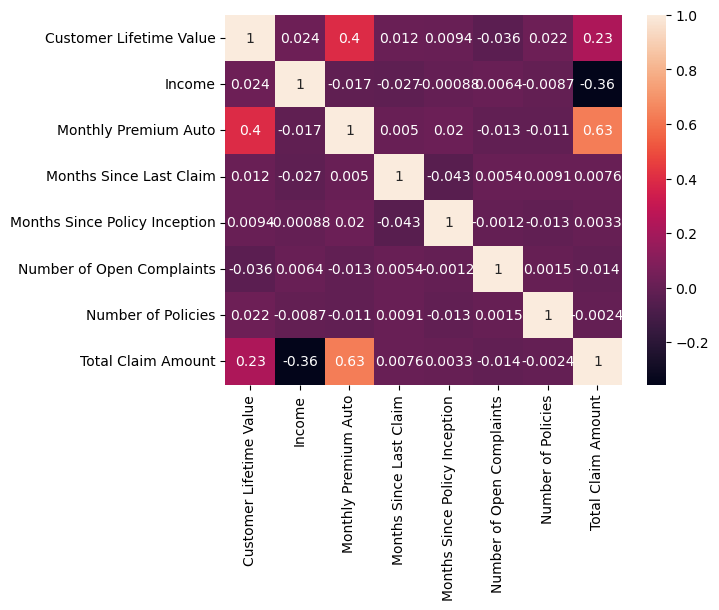

In [4]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

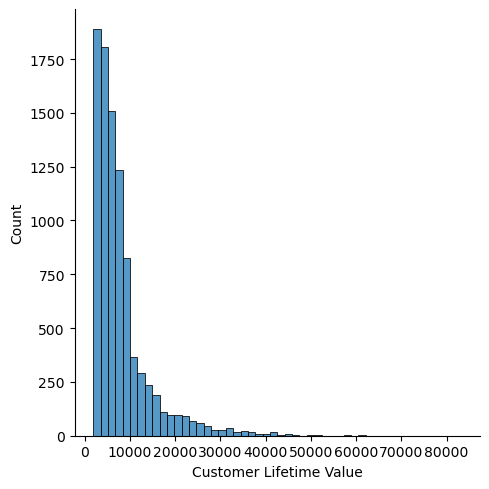

In [5]:
sns.displot(df['Customer Lifetime Value'], bins=50)
plt.show()

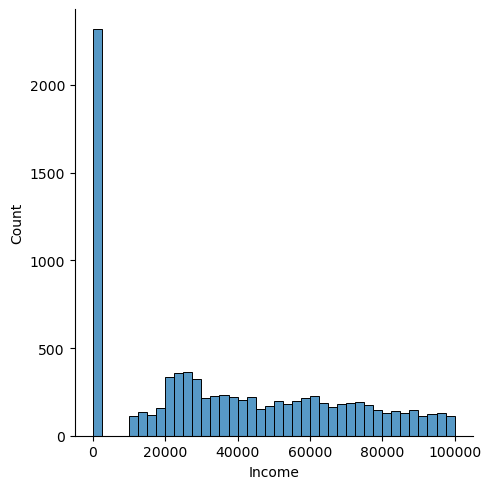

In [6]:
sns.displot(df['Income'], bins=40)
plt.show()

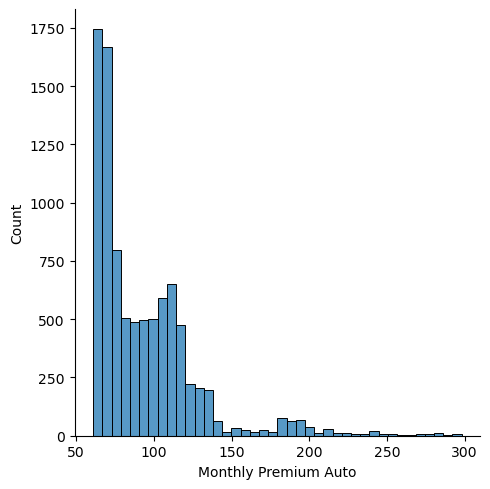

In [7]:
sns.displot(df['Monthly Premium Auto'], bins=40)
plt.show()

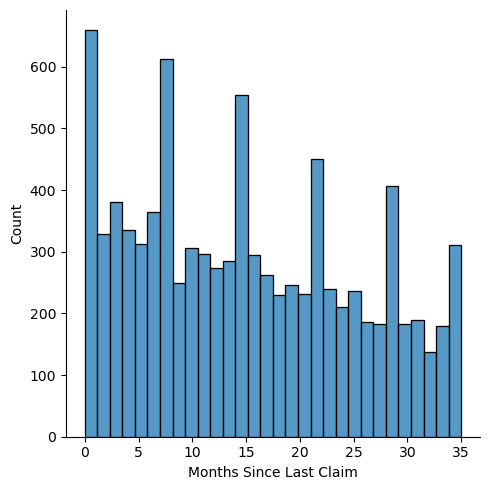

In [8]:
sns.displot(df['Months Since Last Claim'], bins=30)
plt.show()

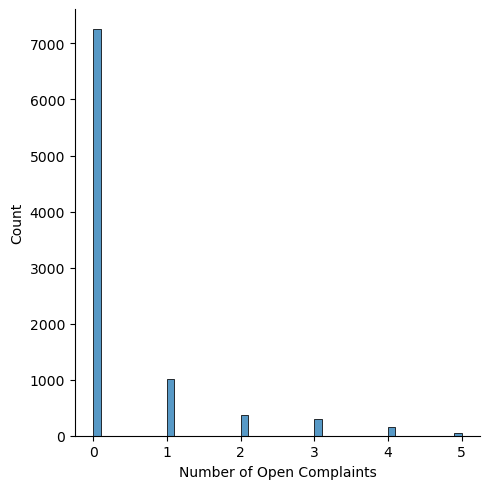

In [9]:
sns.displot(df['Number of Open Complaints'], bins=50)
plt.show()

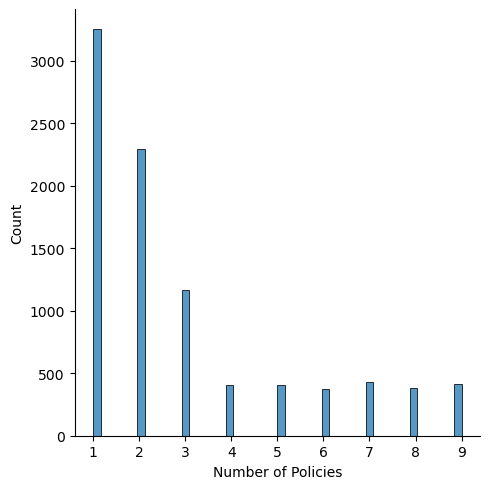

In [10]:
sns.displot(df['Number of Policies'], bins=50)
plt.show()

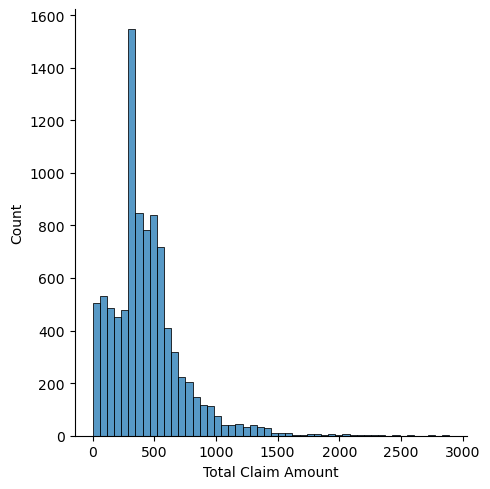

In [11]:
sns.displot(df['Total Claim Amount'], bins=50)
plt.show()

In [12]:
# Non of them look normal, the peak is at the beginning of the x axis

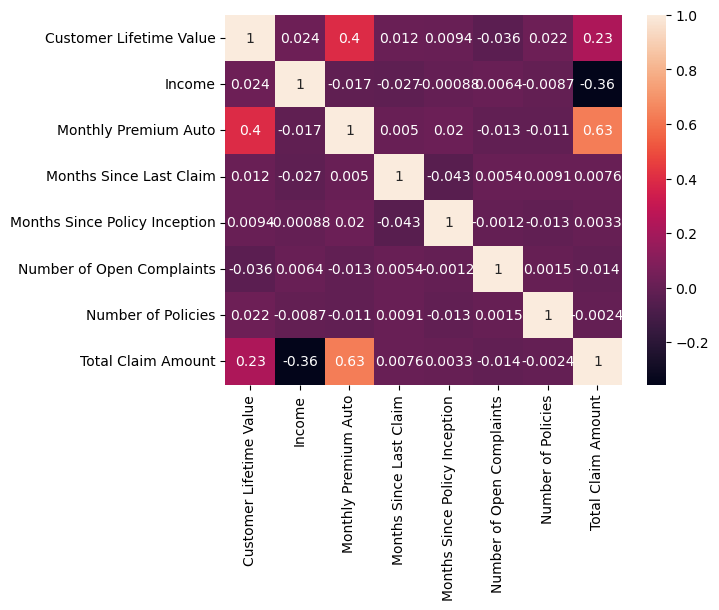

In [13]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# There are no features with such a high correlation (greater than 0.9)

# Start of Lab 5

In [14]:
y = numerical["Total Claim Amount"]
X = numerical.drop(["Total Claim Amount"], axis = 1)

X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [15]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

In [16]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [17]:
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_normalized
normalized_df = pd.DataFrame(x_normalized, columns=X.columns)
print(normalized_df.columns)

(9134, 7)
Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')


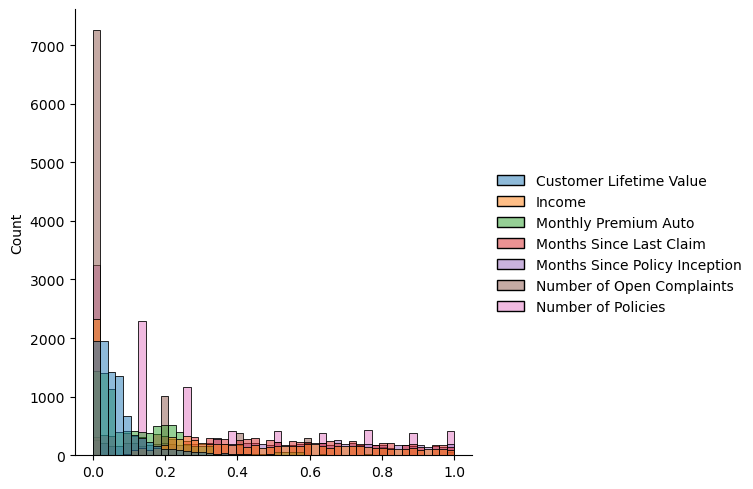

In [18]:
sns.displot(normalized_df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies']])
plt.show()

In [19]:
normalized_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
Income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
Monthly Premium Auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
Months Since Last Claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
Months Since Policy Inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
Number of Open Complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
Number of Policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0


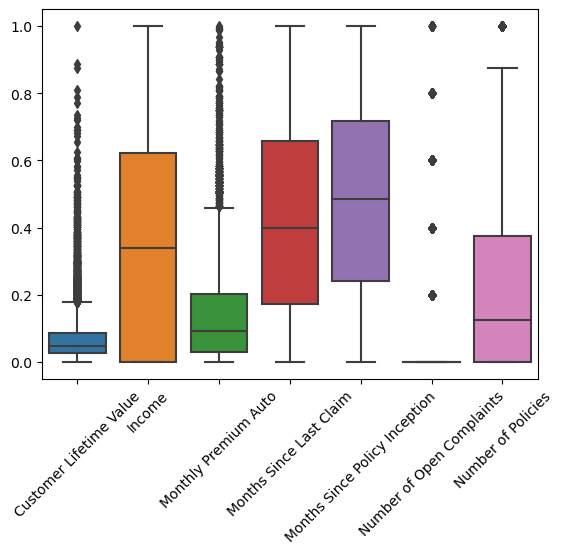

In [20]:
sns.boxplot(normalized_df[['Customer Lifetime Value','Income','Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies']])
plt.xticks(rotation=45)
plt.show()

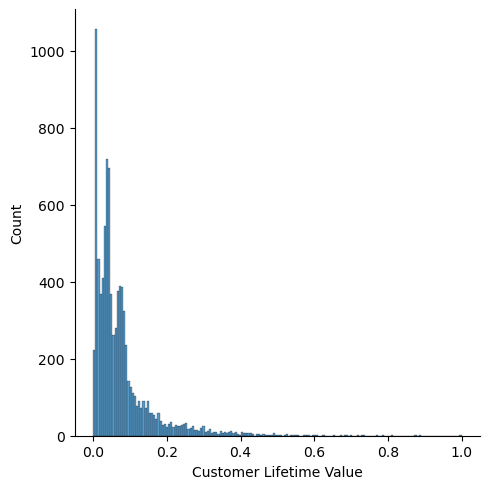

In [21]:
sns.displot(normalized_df['Customer Lifetime Value'])
plt.show()

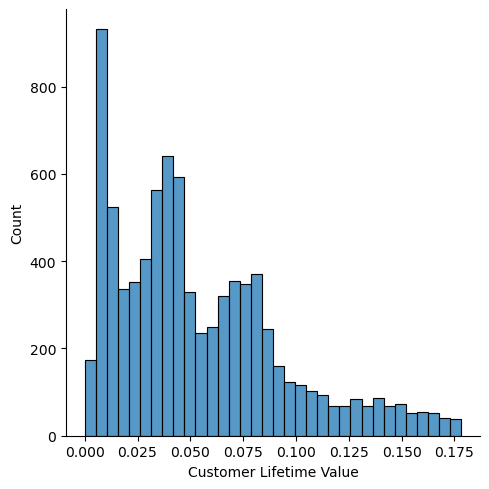

In [22]:
# I am removing the outliers of Customer Lifetime Value the other columns do not present a relevant number of outliers

iqr3 = np.percentile(normalized_df['Customer Lifetime Value'],75) - np.percentile(normalized_df['Customer Lifetime Value'],25)
upper_limit2 = np.percentile(normalized_df['Customer Lifetime Value'],75) + 1.5*iqr3
lower_limit2 = np.percentile(normalized_df['Customer Lifetime Value'],25) - 1.5*iqr3

normalized_df = normalized_df[(normalized_df['Customer Lifetime Value']>lower_limit2) & (normalized_df['Customer Lifetime Value']<upper_limit2)].copy()

sns.displot(normalized_df['Customer Lifetime Value'])
plt.show()


In [23]:
normalized_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,8317.0,0.053805,0.039795,0.0,0.022704,0.043868,0.076935,0.178191
Income,8317.0,0.376456,0.304211,0.0,0.000000,0.338434,0.622408,1.000000
Monthly Premium Auto,8317.0,0.126370,0.131002,0.0,0.029536,0.084388,0.194093,1.000000
Months Since Last Claim,8317.0,0.429554,0.286824,0.0,0.171429,0.400000,0.657143,1.000000
Months Since Policy Inception,8317.0,0.485486,0.282023,0.0,0.242424,0.484848,0.717172,1.000000
Number of Open Complaints,8317.0,0.078634,0.185428,0.0,0.000000,0.000000,0.000000,1.000000
Number of Policies,8317.0,0.254749,0.308874,0.0,0.000000,0.125000,0.375000,1.000000


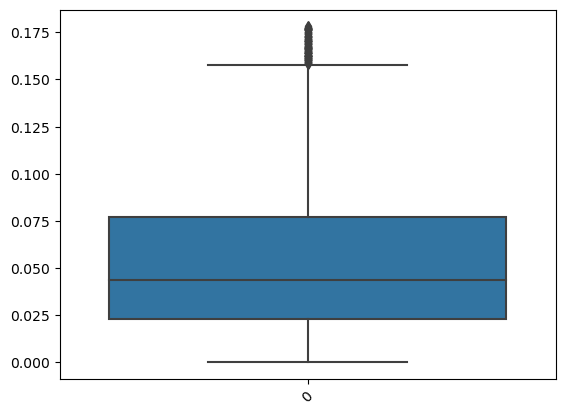

In [24]:
sns.boxplot(normalized_df['Customer Lifetime Value'])
plt.xticks(rotation=45)
plt.show()

In [25]:
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_normalized
normalized_df = pd.DataFrame(x_normalized, columns=X.columns)
print(normalized_df.columns)

(9134, 7)
Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')


In [26]:
normalized_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
Income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
Monthly Premium Auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
Months Since Last Claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
Months Since Policy Inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
Number of Open Complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
Number of Policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0


In [27]:
# df.head()

# categoric.head()

NameError: name 'categoric' is not defined

In [28]:
numerical.head()
y = numerical["Total Claim Amount"]
X = numerical.drop(['Total Claim Amount'], axis=1)

y.head()
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [29]:
transformer = MinMaxScaler().fit(X)
X_normalized = transformer.transform(X)
print(x_normalized.shape)

X_norm=pd.DataFrame(x_normalized, columns=X.columns)
X_norm.head()

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


In [30]:
X_num = X.select_dtypes(include = np.number)
X_cat = df.select_dtypes(include='object')
X_cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [31]:
X_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [32]:
X_cat.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Location Code,Suburban,Suburban,Suburban,Suburban,Rural
Marital Status,Married,Single,Married,Married,Single


In [33]:
# Create encoder to be used on new data later.

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
X = pd.concat([X_norm, X_cat_encode], axis=1)

In [35]:
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,Customer_AA30683,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
X.shape

(9134, 9241)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,Customer_AA30683,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: Total Claim Amount, dtype: float64

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 9241)
(1827, 9241)
(7307,)
(1827,)


In [41]:
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,Customer_AA30683,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
5123,0.035258,0.511537,0.000000,0.800000,0.323232,0.2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7738,0.011416,0.000000,0.075949,0.857143,0.252525,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214,0.012464,0.811124,0.054852,0.200000,0.676768,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8580,0.039793,0.722777,0.012658,0.057143,0.666667,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7857,0.008748,0.547474,0.021097,0.085714,0.868687,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 9241)
(1827, 9241)
(7307,)
(1827,)


In [1]:
# from sklearn import linear_model
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

NameError: name 'linear_model' is not defined

In [2]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

NameError: name 'lm' is not defined

In [ ]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

In [ ]:
y_test[:5]

In [ ]:
predictions_test[:5]

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

In [ ]:
y_test.mean()

In [ ]:
# Start Lab 7

In [ ]:
X.head(10)

In [ ]:
# I will try to Standardnormalize the data

In [ ]:
scaler = StandardScaler()

# Fit and transform the data
normalized_df_st_standardized = scaler.fit_transform(X)

# Create a new DataFrame with the standardized data
df_st_standardized = pd.DataFrame(X_standardized, columns=X.columns)

print(df_standardized)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

In [ ]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)